<a href="https://colab.research.google.com/github/MohamedEmadTammam/Soft_Computin_proj/blob/main/Final_Soft_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1: Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)

In [3]:
#  2: Load Dataset
df = pd.read_csv('/content/heart_2022_no_nans.csv')

# Quick check to confirm it's loaded
print(df.head())
print(f"Dataset shape: {df.shape}")

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         9.0            Non

In [4]:
# Set features and label
X = df.drop('CovidPos', axis=1)  # Drop the target column
y = df['CovidPos']               # Target is CovidPos

# Confirm shape
print(f"Number of features: {X.shape[1]}")

# Handle NaN values in the target variable before splitting
# Drop rows where the target 'CovidPos' is NaN
initial_rows = df.shape[0]
df.dropna(subset=['CovidPos'], inplace=True)
rows_after_drop = df.shape[0]
print(f"Dropped {initial_rows - rows_after_drop} rows due to NaN in 'CovidPos'")

# Re-assign features and label after dropping rows
X = df.drop('CovidPos', axis=1)
y = df['CovidPos']

# Confirm shape after dropping NaNs in target
print(f"Dataset shape after handling target NaNs: {df.shape}")

# %%
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le

# Confirm all numeric now
print(X.head())
print(X.dtypes)

# %%
# Check for NaN values in features (already handled in the original code)
print("Missing values in dataset:\n", X.isnull().sum())

# Fill any NaN values in features with the column mean (or you can drop them instead)
# This was already present and is still necessary for features
X.fillna(X.mean(), inplace=True)

# %%
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# %%
# Initialize and train Random Forest Classifier
model_rf = RandomForestClassifier(random_state=SEED)
model_rf.fit(X_train_scaled, y_train)

Number of features: 39
Dropped 1 rows due to NaN in 'CovidPos'
Dataset shape after handling target NaNs: (34588, 40)
   State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0      0    0              4                 4.0               0.0   
1      0    1              4                 0.0               0.0   
2      0    1              4                 0.0               0.0   
3      0    0              1                 5.0               0.0   
4      0    0              2                 3.0              15.0   

   LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
0                3                   1         9.0             3   
1                3                   1         6.0             3   
2                3                   0         8.0             1   
3                3                   1         9.0             3   
4                3                   1         5.0             0   

   HadHeartAttack  ...  AgeCategory  HeightInMeters  

RandomForestClassifier(random_state=42)

In [5]:
# Predict on test data
predictions = model_rf.predict(X_test_scaled)


In [6]:
# Accuracy score
acc = accuracy_score(y_test, predictions)
print(f'Random Forest Accuracy: {acc:.4f}')

# Classification report
print(classification_report(y_test, predictions))


Random Forest Accuracy: 0.6641
                                                               precision    recall  f1-score   support

                                                           No       0.68      0.96      0.79      4604
Tested positive using home test without a health professional       0.00      0.00      0.00       283
                                                          Yes       0.46      0.08      0.14      2031

                                                     accuracy                           0.66      6918
                                                    macro avg       0.38      0.35      0.31      6918
                                                 weighted avg       0.59      0.66      0.57      6918



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


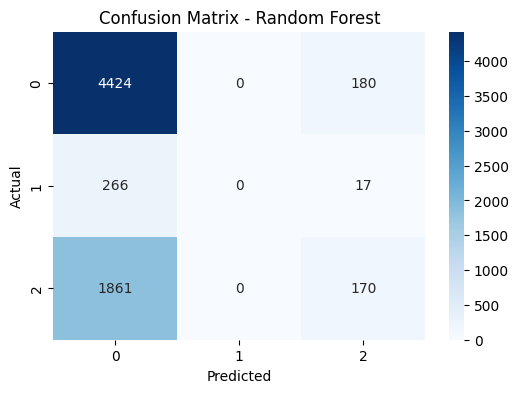

In [7]:
# Confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [8]:
# GA Hyperparameters
size = 20
n_feat = X_train.shape[1]
n_parents = 10
mutation_rate = 0.1
n_gen = 10


In [9]:
import numpy as np
from sklearn.metrics import accuracy_score

def initialize_population(size, n_feat):
    """Initialize population with 30% zeros and 70% ones per chromosome."""
    return [np.random.permutation(
                np.concatenate((np.zeros(int(0.3 * n_feat), dtype=bool),
                                np.ones(n_feat - int(0.3 * n_feat), dtype=bool)))
            ) for _ in range(size)]

def evaluate_fitness(population, model, X_train, X_test, y_train, y_test):
    """Evaluate fitness score using model accuracy."""
    scores = []
    for chromosome in population:
        if not np.any(chromosome):
            scores.append(0)
            continue
        # Ensure X_train and X_test are numpy arrays before slicing
        X_train_np = np.array(X_train)
        X_test_np = np.array(X_test)
        model.fit(X_train_np[:, chromosome], y_train)
        pred = model.predict(X_test_np[:, chromosome])
        scores.append(accuracy_score(y_test, pred))

    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)[::-1]
    return list(scores[inds]), list(population[inds])

def select_top(population, n_parents):
    """Select top n chromosomes."""
    return population[:n_parents]

def crossover(parents):
    """One-point crossover between pairs of parents."""
    next_gen = parents.copy()
    for i in range(0, len(parents) - 1, 2):
        cut = len(parents[i]) // 2
        child = np.concatenate((parents[i][:cut], parents[i + 1][cut:]))
        next_gen.append(child)
    return next_gen

def mutate(population, mutation_rate, n_feat):
    """Randomly flip bits in chromosomes."""
    n_mutations = int(mutation_rate * n_feat)
    mutated = []
    for chromo in population:
        chromo = chromo.copy()
        indices = np.random.choice(n_feat, n_mutations, replace=False)
        chromo[indices] = ~chromo[indices]
        mutated.append(chromo)
    return mutated

def run_ga(size, n_feat, n_parents, mutation_rate, n_gen, X_train, X_test, y_train, y_test, model):
    """Run the full Genetic Algorithm."""
    population = initialize_population(size, n_feat)
    best_chromosomes, best_scores = [], []

    for gen in range(n_gen):
        # Pass the model to evaluate_fitness
        scores, sorted_pop = evaluate_fitness(population, model, X_train, X_test, y_train, y_test)
        print(f"Generation {gen+1}: Best Score = {scores[0]:.4f}")

        parents = select_top(sorted_pop, n_parents)
        offspring = crossover(parents)
        population = mutate(offspring, mutation_rate, n_feat)

        best_chromosomes.append(sorted_pop[0])
        best_scores.append(scores[0])

    return best_chromosomes, best_scores

# Run GA after hyperparameter optimization
# Correct the function name to run_ga and pass the model_rf
best_chromo, best_score = run_ga(size, n_feat, n_parents, mutation_rate, n_gen,
                                 X_train_scaled, X_test_scaled, y_train, y_test, model_rf)

Generation 1: Best Score = 0.6667
Generation 2: Best Score = 0.6646
Generation 3: Best Score = 0.6623
Generation 4: Best Score = 0.6633
Generation 5: Best Score = 0.6662
Generation 6: Best Score = 0.6649
Generation 7: Best Score = 0.6625
Generation 8: Best Score = 0.6631
Generation 9: Best Score = 0.6646
Generation 10: Best Score = 0.6639


Best features selected by GA:
Index(['State', 'Sex', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'SleepHours', 'HadHeartAttack', 'HadAngina',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'DifficultyConcentrating',
       'DifficultyWalking', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan',
       'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters',
       'WeightInKilograms', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear'],
      dtype='object')
Accuracy (GA): 66.39%
                                                               precision    recall  f1-score   support

                                                           No       0.68      0.95      0.79      4604
Tested positive using home test without a health professional       0.00      0.00      0.00       283
                                                        

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


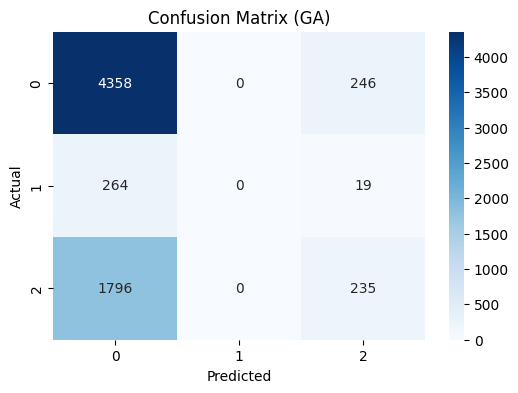

In [11]:
# 6: Evaluate GA Model
best_chromosome = best_chromo[-1]
selected_features = X.columns[best_chromosome]

print("Best features selected by GA:")
print(selected_features)

X_train_ga = X_train_scaled[:, best_chromosome]
X_test_ga = X_test_scaled[:, best_chromosome]

model_ga = RandomForestClassifier(random_state=SEED)
model_ga.fit(X_train_ga, y_train)
pred_ga = model_ga.predict(X_test_ga)

print("Accuracy (GA): {:.2f}%".format(accuracy_score(y_test, pred_ga) * 100))
print(classification_report(y_test, pred_ga))

cm_ga = confusion_matrix(y_test, pred_ga)
print("Confusion Matrix (GA):")
print(cm_ga)

plt.figure(figsize=(6,4))
sns.heatmap(cm_ga, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (GA)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [15]:
# 7: PSO Hyperparameters
n_particles = 20
n_iterations = 25
n_features = X_train.shape[1]

w, c1, c2 = 0.5, 1.5, 1.5

particles = np.random.rand(n_particles, n_features)
velocities = np.random.rand(n_particles, n_features)

personal_best_positions = particles.copy()
personal_best_scores = np.zeros(n_particles)


In [16]:
# 8: PSO Initial Evaluation
for i in range(n_particles):
    selected = particles[i] > 0.5
    if np.sum(selected) == 0:
        personal_best_scores[i] = 0
    else:
        model = RandomForestClassifier(random_state=SEED)
        model.fit(X_train_scaled[:, selected], y_train)
        preds = model.predict(X_test_scaled[:, selected])
        personal_best_scores[i] = accuracy_score(y_test, preds)

global_best_idx = np.argmax(personal_best_scores)
global_best_position = personal_best_positions[global_best_idx].copy()


In [17]:
# 9: PSO Main Loop
for iteration in range(n_iterations):
    for i in range(n_particles):
        r1, r2 = np.random.rand(n_features), np.random.rand(n_features)
        velocities[i] = (w * velocities[i]
                         + c1 * r1 * (personal_best_positions[i] - particles[i])
                         + c2 * r2 * (global_best_position - particles[i]))
        particles[i] += velocities[i]
        particles[i] = np.clip(particles[i], 0, 1)

        selected = particles[i] > 0.5
        if np.sum(selected) == 0:
            score = 0
        else:
            model = RandomForestClassifier(random_state=SEED)
            model.fit(X_train_scaled[:, selected], y_train)
            preds = model.predict(X_test_scaled[:, selected])
            score = accuracy_score(y_test, preds)

        if score > personal_best_scores[i]:
            personal_best_scores[i] = score
            personal_best_positions[i] = particles[i].copy()

    global_best_idx = np.argmax(personal_best_scores)
    global_best_position = personal_best_positions[global_best_idx].copy()
    print(f"Iteration {iteration+1}/{n_iterations}, Best Accuracy: {personal_best_scores[global_best_idx]:.4f}")


Iteration 1/25, Best Accuracy: 0.6668
Iteration 2/25, Best Accuracy: 0.6668
Iteration 3/25, Best Accuracy: 0.6668
Iteration 4/25, Best Accuracy: 0.6668
Iteration 5/25, Best Accuracy: 0.6677
Iteration 6/25, Best Accuracy: 0.6681
Iteration 7/25, Best Accuracy: 0.6681
Iteration 8/25, Best Accuracy: 0.6681
Iteration 9/25, Best Accuracy: 0.6683
Iteration 10/25, Best Accuracy: 0.6683
Iteration 11/25, Best Accuracy: 0.6683
Iteration 12/25, Best Accuracy: 0.6683
Iteration 13/25, Best Accuracy: 0.6683
Iteration 14/25, Best Accuracy: 0.6683
Iteration 15/25, Best Accuracy: 0.6683
Iteration 16/25, Best Accuracy: 0.6683
Iteration 17/25, Best Accuracy: 0.6683
Iteration 18/25, Best Accuracy: 0.6683
Iteration 19/25, Best Accuracy: 0.6683
Iteration 20/25, Best Accuracy: 0.6683
Iteration 21/25, Best Accuracy: 0.6683
Iteration 22/25, Best Accuracy: 0.6683
Iteration 23/25, Best Accuracy: 0.6683
Iteration 24/25, Best Accuracy: 0.6683
Iteration 25/25, Best Accuracy: 0.6683


Best features selected by PSO:
Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'WeightInKilograms', 'AlcoholDrinkers', 'HIVTesting',
       'FluVaxLast12', 'TetanusLast10Tdap'],
      dtype='object')
Accuracy (PSO): 66.83%
                                                               precision    recall  f1-score   support

                                                           No       0.68      0.96      0.80      4604
Tested positive using home test without a health professional       0.00      0.00      0.00       283
                  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


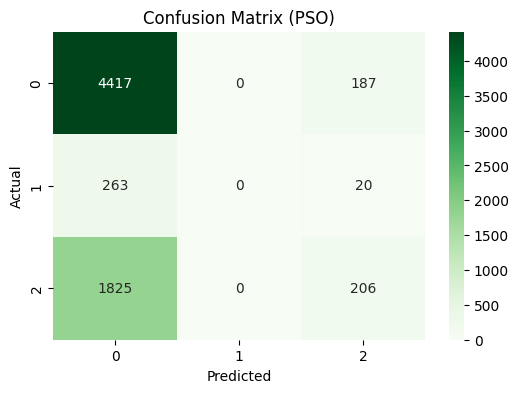

In [18]:
# 10: Evaluate PSO Model
best_features_mask = global_best_position > 0.5
selected_features = X.columns[best_features_mask]

print("Best features selected by PSO:")
print(selected_features)

X_train_pso = X_train_scaled[:, best_features_mask]
X_test_pso = X_test_scaled[:, best_features_mask]

final_model = RandomForestClassifier(random_state=SEED)
final_model.fit(X_train_pso, y_train)

pred_pso = final_model.predict(X_test_pso)

print("Accuracy (PSO): {:.2f}%".format(accuracy_score(y_test, pred_pso) * 100))
print(classification_report(y_test, pred_pso))

cm_pso = confusion_matrix(y_test, pred_pso)
print("Confusion Matrix (PSO):")
print(cm_pso)

plt.figure(figsize=(6,4))
sns.heatmap(cm_pso, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (PSO)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
